In [2336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
import plotly.figure_factory as ff
import plotly.express as px
import seaborn as sns

rootpath = "../DataScience/"

df2015 = pd.read_csv(rootpath + '2015.csv')
df2016 = pd.read_csv(rootpath + '2016.csv')
df2017 = pd.read_csv(rootpath + '2017.csv')
df2018 = pd.read_csv(rootpath + '2018.csv')
df2019 = pd.read_csv(rootpath + '2019.csv')
df2020 = pd.read_csv(rootpath + '2020.csv')
df2021 = pd.read_csv(rootpath + '2021.csv')
df2022 = pd.read_csv(rootpath + '2022.csv')

In [2337]:
df2015.shape, df2016.shape, df2017.shape, df2018.shape, df2019.shape, df2020.shape, df2021.shape, df2022.shape

((158, 12),
 (157, 13),
 (155, 12),
 (156, 9),
 (156, 9),
 (153, 20),
 (149, 20),
 (146, 12))

In [2338]:
#Add year column
yrs = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
dfs = [df2015, df2016, df2017, df2018, df2019, df2020, df2021, df2022]
for i in range(0,8):
    dfs[i]['Year'] = yrs[i]

In [2339]:
#Explore common column names
df2015.columns.to_list()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual',
 'Year']

In [2340]:
df2017.columns.to_list()

['Country',
 'Happiness.Rank',
 'Happiness.Score',
 'Whisker.high',
 'Whisker.low',
 'Economy..GDP.per.Capita.',
 'Family',
 'Health..Life.Expectancy.',
 'Freedom',
 'Generosity',
 'Trust..Government.Corruption.',
 'Dystopia.Residual',
 'Year']

In [2341]:
df2018.columns.to_list()

['Overall rank',
 'Country or region',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Year']

In [2342]:
#Decide final columns
final_cols = ['Happiness Rank', 'Country', 'Region', 'Happiness Score', 'Economy (GDP per Capita)', 'Family (Social Support)','Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)','Generosity','Year']

In [2343]:
#clean data of 2015
#modify column names
df2015 = df2015.rename(columns={'Family':'Family (Social Support)'})
df2015.head(2)

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   

   Standard Error  Economy (GDP per Capita)  Family (Social Support)  \
0         0.03411                   1.39651                  1.34951   
1         0.04884                   1.30232                  1.40223   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   

   Generosity  Dystopia Residual  Year  
0     0.29678            2.51738  2015  
1     0.43630            2.70201  2015

In [2344]:
#clean data of 2016
df2016 = df2016.rename(columns={'Family':'Family (Social Support)'})
df2016.head(2)

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   

   Economy (GDP per Capita)  Family (Social Support)  \
0                   1.44178                  1.16374   
1                   1.52733                  1.14524   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.79504  0.57941                        0.44453   
1                   0.86303  0.58557                        0.41203   

   Generosity  Dystopia Residual  Year  
0     0.36171            2.73939  2016  
1     0.28083            2.69463  2016

In [2345]:
#clean data of 2017
df2017 = df2017.rename(columns={'Happiness.Rank':'Happiness Rank', 'Happiness.Score':'Happiness Score','Economy..GDP.per.Capita.':'Economy (GDP per Capita)','Family':'Family (Social Support)','Health..Life.Expectancy.':'Health (Life Expectancy)','Trust..Government.Corruption.':'Trust (Government Corruption)'})
# add region column
df2017 = df2017.merge(df2015[["Country","Region"]], on="Country", how="left")
df2017["Region"] = df2017["Region"].fillna('-')
df2017.head(2)

Country  Happiness Rank  Happiness Score  Whisker.high  Whisker.low  \
0   Norway               1            7.537      7.594445     7.479556   
1  Denmark               2            7.522      7.581728     7.462272   

   Economy (GDP per Capita)  Family (Social Support)  \
0                  1.616463                 1.533524   
1                  1.482383                 1.551122   

   Health (Life Expectancy)   Freedom  Generosity  \
0                  0.796667  0.635423    0.362012   
1                  0.792566  0.626007    0.355280   

   Trust (Government Corruption)  Dystopia.Residual  Year          Region  
0                       0.315964           2.277027  2017  Western Europe  
1                       0.400770           2.313707  2017  Western Europe

In [2346]:
#clean data of 2018
df2018 = df2018.rename(columns={'Overall rank':'Happiness Rank', 'Country or region':'Country', 'Score':'Happiness Score', 'GDP per capita':'Economy (GDP per Capita)','Social support':'Family (Social Support)','Healthy life expectancy':'Health (Life Expectancy)','Freedom to make life choices':'Freedom','Perceptions of corruption':'Trust (Government Corruption)'})
# add region column
df2018 = df2018.merge(df2015[["Country","Region"]], on="Country", how="left")
df2018["Region"] = df2018["Region"].fillna('-')
df2018.head(2)


Happiness Rank  Country  Happiness Score  Economy (GDP per Capita)  \
0               1  Finland            7.632                     1.305   
1               2   Norway            7.594                     1.456   

   Family (Social Support)  Health (Life Expectancy)  Freedom  Generosity  \
0                    1.592                     0.874    0.681       0.202   
1                    1.582                     0.861    0.686       0.286   

   Trust (Government Corruption)  Year          Region  
0                          0.393  2018  Western Europe  
1                          0.340  2018  Western Europe

In [2347]:
#clean data of 2019
df2019 = df2019.rename(columns={'Overall rank':'Happiness Rank', 'Country or region':'Country', 'Score':'Happiness Score', 'GDP per capita':'Economy (GDP per Capita)','Social support':'Family (Social Support)','Healthy life expectancy':'Health (Life Expectancy)','Freedom to make life choices':'Freedom','Perceptions of corruption':'Trust (Government Corruption)'})
df2019 = df2019.merge(df2015[["Country","Region"]], on="Country", how="left")
df2019["Region"] = df2019["Region"].fillna('-')
df2019.head(2)

Happiness Rank  Country  Happiness Score  Economy (GDP per Capita)  \
0               1  Finland            7.769                     1.340   
1               2  Denmark            7.600                     1.383   

   Family (Social Support)  Health (Life Expectancy)  Freedom  Generosity  \
0                    1.587                     0.986    0.596       0.153   
1                    1.573                     0.996    0.592       0.252   

   Trust (Government Corruption)  Year          Region  
0                          0.393  2019  Western Europe  
1                          0.410  2019  Western Europe

In [2348]:
#clean data of 2020
df2020 = df2020.rename(columns={'Country name':'Country','Regional indicator': 'Region','Ladder score':'Happiness Score','Explained by: Social support':'Family (Social Support)','Explained by: Healthy life expectancy':'Health (Life Expectancy)','Explained by: Freedom to make life choices':'Freedom','Explained by: Perceptions of corruption':'Trust (Government Corruption)','Explained by: Log GDP per capita':'Economy (GDP per Capita)','Explained by: Generosity':'Generosity'})
#add rank column
df2020['Happiness Rank'] = [i for i in range(1, len(df2020.index)+1)]
df2020.head(3)

Country          Region  Happiness Score  \
0      Finland  Western Europe           7.8087   
1      Denmark  Western Europe           7.6456   
2  Switzerland  Western Europe           7.5599   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                        0.031156      7.869766      7.747634   
1                        0.033492      7.711245      7.579955   
2                        0.035014      7.628528      7.491272   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0              10.639267        0.954330                71.900825   
1              10.774001        0.955991                72.402504   
2              10.979933        0.942847                74.102448   

   Freedom to make life choices  ...  Ladder score in Dystopia  \
0                      0.949172  ...                  1.972317   
1                      0.951444  ...                  1.972317   
2                      0.921337  ...                  1.972317   

   Economy (GDP per Capita)  Family (Social Support)  \
0                  1.285190                 1.499526   
1                  1.326949                 1.503449   
2                  1.390774                 1.472403   

   Health (Life Expectancy)   Freedom  Generosity  \
0                  0.961271  0.662317    0.159670   
1                  0.979333  0.665040    0.242793   
2                  1.040533  0.628954    0.269056   

   Trust (Government Corruption)  Dystopia + residual  Year  Happiness Rank  
0                       0.477857             2.762835  2020               1  
1                       0.495260             2.432741  2020               2  
2                       0.407946             2.350267  2020               3  

[3 rows x 22 columns]

In [2349]:
df2020 = df2020.loc[:,~df2020.columns.duplicated(keep='last')]
df2020.head(3)

Country          Region  Happiness Score  \
0      Finland  Western Europe           7.8087   
1      Denmark  Western Europe           7.6456   
2  Switzerland  Western Europe           7.5599   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                        0.031156      7.869766      7.747634   
1                        0.033492      7.711245      7.579955   
2                        0.035014      7.628528      7.491272   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0              10.639267        0.954330                71.900825   
1              10.774001        0.955991                72.402504   
2              10.979933        0.942847                74.102448   

   Freedom to make life choices  ...  Ladder score in Dystopia  \
0                      0.949172  ...                  1.972317   
1                      0.951444  ...                  1.972317   
2                      0.921337  ...                  1.972317   

   Economy (GDP per Capita)  Family (Social Support)  \
0                  1.285190                 1.499526   
1                  1.326949                 1.503449   
2                  1.390774                 1.472403   

   Health (Life Expectancy)   Freedom  Generosity  \
0                  0.961271  0.662317    0.159670   
1                  0.979333  0.665040    0.242793   
2                  1.040533  0.628954    0.269056   

   Trust (Government Corruption)  Dystopia + residual  Year Happiness Rank  
0                       0.477857             2.762835  2020              1  
1                       0.495260             2.432741  2020              2  
2                       0.407946             2.350267  2020              3  

[3 rows x 21 columns]

In [2350]:
#clean data of 2021
df2021 = df2021.rename(columns={'Country name':'Country','Regional indicator': 'Region','Ladder score':'Happiness Score','Explained by: Social support':'Family (Social Support)','Explained by: Healthy life expectancy':'Health (Life Expectancy)','Explained by: Freedom to make life choices':'Freedom','Explained by: Perceptions of corruption':'Trust (Government Corruption)','Explained by: Log GDP per capita':'Economy (GDP per Capita)','Explained by: Generosity':'Generosity'})
df2021 = df2021.loc[:,~df2021.columns.duplicated(keep='last')]
df2021['Happiness Rank'] = [i for i in range(1, len(df2021.index)+1)]
df2021.head(2)

Country          Region  Happiness Score  Standard error of ladder score  \
0  Finland  Western Europe            7.842                           0.032   
1  Denmark  Western Europe            7.620                           0.035   

   upperwhisker  lowerwhisker  Logged GDP per capita  Social support  \
0         7.904         7.780                 10.775           0.954   
1         7.687         7.552                 10.933           0.954   

   Healthy life expectancy  Freedom to make life choices  ...  \
0                     72.0                         0.949  ...   
1                     72.7                         0.946  ...   

   Ladder score in Dystopia  Economy (GDP per Capita)  \
0                      2.43                     1.446   
1                      2.43                     1.502   

   Family (Social Support)  Health (Life Expectancy)  Freedom  Generosity  \
0                    1.106                     0.741    0.691       0.124   
1                    1.108                     0.763    0.686       0.208   

   Trust (Government Corruption)  Dystopia + residual  Year Happiness Rank  
0                          0.481                3.253  2021              1  
1                          0.485                2.868  2021              2  

[2 rows x 21 columns]

In [2351]:
#clean data of 2022
df2022 = df2022.merge(df2015[["Country","Region"]], on="Country", how="left")
df2022["Region"] = df2022["Region"].fillna('-')
df2022 = df2022.rename(columns={'RANK':'Happiness Rank','Happiness score':'Happiness Score','Explained by: GDP per capita':'Economy (GDP per Capita)', 'Explained by: Social support':'Family (Social Support)','Explained by: Healthy life expectancy':'Health (Life Expectancy)','Explained by: Freedom to make life choices':'Freedom','Explained by: Generosity':'Generosity', 'Explained by: Perceptions of corruption':'Trust (Government Corruption)'})
df2022.head(2)

Happiness Rank  Country  Happiness Score  Whisker-high  Whisker-low  \
0               1  Finland            7.821         7.886        7.756   
1               2  Denmark            7.636         7.710        7.563   

   Dystopia (1.83) + residual  Economy (GDP per Capita)  \
0                       2.518                     1.892   
1                       2.226                     1.953   

   Family (Social Support)  Health (Life Expectancy)  Freedom  Generosity  \
0                    1.258                     0.775    0.736       0.109   
1                    1.243                     0.777    0.719       0.188   

   Trust (Government Corruption)  Year          Region  
0                          0.534  2022  Western Europe  
1                          0.532  2022  Western Europe

In [2352]:
#merge df
dfs = [df2015[final_cols], df2016[final_cols], df2017[final_cols], df2018[final_cols], df2019[final_cols], df2020[final_cols], df2021[final_cols], df2022[final_cols]]

In [2353]:
df_merged = pd.DataFrame(columns=final_cols)
df_merged = pd.concat(dfs)
#delete missing data
df_merged.dropna(axis='rows',inplace=True)

In [2354]:
df_merged.head(10)

Happiness Rank      Country                     Region  Happiness Score  \
0               1  Switzerland             Western Europe            7.587   
1               2      Iceland             Western Europe            7.561   
2               3      Denmark             Western Europe            7.527   
3               4       Norway             Western Europe            7.522   
4               5       Canada              North America            7.427   
5               6      Finland             Western Europe            7.406   
6               7  Netherlands             Western Europe            7.378   
7               8       Sweden             Western Europe            7.364   
8               9  New Zealand  Australia and New Zealand            7.286   
9              10    Australia  Australia and New Zealand            7.284   

   Economy (GDP per Capita)  Family (Social Support)  \
0                   1.39651                  1.34951   
1                   1.30232                  1.40223   
2                   1.32548                  1.36058   
3                   1.45900                  1.33095   
4                   1.32629                  1.32261   
5                   1.29025                  1.31826   
6                   1.32944                  1.28017   
7                   1.33171                  1.28907   
8                   1.25018                  1.31967   
9                   1.33358                  1.30923   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   
5                   0.88911  0.64169                        0.41372   
6                   0.89284  0.61576                        0.31814   
7                   0.91087  0.65980                        0.43844   
8                   0.90837  0.63938                        0.42922   
9                   0.93156  0.65124                        0.35637   

   Generosity  Year  
0     0.29678  2015  
1     0.43630  2015  
2     0.34139  2015  
3     0.34699  2015  
4     0.45811  2015  
5     0.23351  2015  
6     0.47610  2015  
7     0.36262  2015  
8     0.47501  2015  
9     0.43562  2015

In [2355]:
df_merged.tail(10)
df_merged.drop(df_merged.index[(df_merged['Region'] == '-')], inplace=True)

In [2356]:
df_merged.tail(10)

Happiness Rank       Country                           Region  \
133             134        Jordan  Middle East and Northern Africa   
134             135          Togo               Sub-Saharan Africa   
135             136         India                    Southern Asia   
136             137        Zambia               Sub-Saharan Africa   
137             138        Malawi               Sub-Saharan Africa   
138             139      Tanzania               Sub-Saharan Africa   
139             140  Sierra Leone               Sub-Saharan Africa   
143             144      Zimbabwe               Sub-Saharan Africa   
144             145       Lebanon  Middle East and Northern Africa   
145             146   Afghanistan                    Southern Asia   

     Happiness Score  Economy (GDP per Capita)  Family (Social Support)  \
133            4.152                     1.324                    0.724   
134            4.112                     0.771                    0.322   
135            3.777                     1.167                    0.376   
136            3.760                     0.930                    0.577   
137            3.750                     0.648                    0.279   
138            3.702                     0.848                    0.597   
139            3.574                     0.686                    0.416   
143            2.995                     0.947                    0.690   
144            2.955                     1.392                    0.498   
145            2.404                     0.758                    0.000   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
133                     0.675    0.476                          0.200   
134                     0.360    0.292                          0.132   
135                     0.471    0.647                          0.123   
136                     0.306    0.525                          0.083   
137                     0.388    0.477                          0.157   
138                     0.425    0.578                          0.270   
139                     0.273    0.387                          0.055   
143                     0.270    0.329                          0.105   
144                     0.631    0.103                          0.034   
145                     0.289    0.000                          0.005   

     Generosity  Year  
133       0.058  2022  
134       0.174  2022  
135       0.198  2022  
136       0.203  2022  
137       0.140  2022  
138       0.248  2022  
139       0.202  2022  
143       0.106  2022  
144       0.082  2022  
145       0.089  2022

In [2357]:
#check null values
df_merged.dropna(axis='rows',inplace=True)
df_merged.isnull().any()

Happiness Rank                   False
Country                          False
Region                           False
Happiness Score                  False
Economy (GDP per Capita)         False
Family (Social Support)          False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)    False
Generosity                       False
Year                             False
dtype: bool

In [2358]:
#save cleaned data
df = df_merged.to_csv( rootpath + 'cleaned_data.csv')

In [2359]:
#DEFINE DATATYPE
df = df_merged
df = df.astype({'Happiness Rank':'int32',
                'Happiness Score':'float',
                'Country':'str',
                'Region':'str',
                'Family (Social Support)':'float',
                'Health (Life Expectancy)':'float',
                'Economy (GDP per Capita)':'float',
                'Freedom':'float',
                'Trust (Government Corruption)':'float',
                'Generosity':'float',
                'Year':'int32'})
print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893 entries, 0 to 145
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 893 non-null    int32  
 1   Country                        893 non-null    object 
 2   Region                         893 non-null    object 
 3   Happiness Score                893 non-null    float64
 4   Economy (GDP per Capita)       893 non-null    float64
 5   Family (Social Support)        893 non-null    float64
 6   Health (Life Expectancy)       893 non-null    float64
 7   Freedom                        893 non-null    float64
 8   Trust (Government Corruption)  893 non-null    float64
 9   Generosity                     893 non-null    float64
 10  Year                           893 non-null    int32  
dtypes: float64(7), int32(2), object(2)
memory usage: 76.7+ KB
None


In [2360]:

# 10 Happiest Countries in the World in 2022


happiest_countries = df.groupby(['Country'], sort = False)['Happiness Score', 'Year', 'Economy (GDP per Capita)'].max()
top10 = happiest_countries.sort_values('Happiness Score', ascending = False)[:10]
fig_Top10_scatter = px.scatter(top10,
                x = top10.index,
                y = 'Happiness Score',
                size = 'Economy (GDP per Capita)',
                color = top10.index,
                template = 'xgridoff',
                animation_frame = 'Year',
                title = '2022 The Top 10 Happiest Countries in The World <br> (Bubble Size Indicates GDP)')
fig_Top10_scatter.show()


C:\Users\19449\AppData\Local\Temp\ipykernel_24048\1499367458.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [2361]:
from pandas import DataFrame
#line chart for top 10 happiness countries in the world from 2015-2022
import plotly.express as pe
de_linear = df
de_linear = de_linear.groupby('Country').mean()
de_linear = de_linear.sort_values('Happiness Score',ascending= False)
print(de_linear)
#switch series to dataframe!!!!!!!!!!
de_linear = de_linear.add_suffix('_Average').reset_index()
top10_country_list = de_linear[:10]
print(top10_country_list[top10_country_list.columns[0:3]])
de_linear = df.query('Country in @top10_country_list.Country')
fig_Top10_linear = pe.line(de_linear, x= 'Year', y='Happiness Score', color='Country', title='Line Chart for Top 10 Countries')
fig_Top10_linear.show()

                          Happiness Rank  Happiness Score  \
Country                                                     
Finland                         2.142857         7.679243   
Denmark                         2.125000         7.578950   
Switzerland                     3.142857         7.531414   
Iceland                         3.375000         7.521313   
Norway                          3.857143         7.508286   
...                                  ...              ...   
Burundi                       147.800000         3.427060   
Rwanda                        151.200000         3.408060   
Central African Republic      152.400000         3.202580   
Afghanistan                   149.200000         2.940180   
South Sudan                   152.000000         2.816600   

                          Economy (GDP per Capita)  Family (Social Support)  \
Country                                                                       
Finland                                   1.4453

In [2362]:
#Comparing Happiness Scores Across Regions

df['Continent'] = ['Asia' if (i == 'Eastern Asia' or i == 'Southern Asia' or i == 'Southeastern Asia' or i == 'East Asia' or i == 'Southeast Asia' or i == 'South Asia')
else 'Europe' if (i == 'Western Europe' or i == 'Central and Eastern Europe')
else 'Middle East' if (i == 'Middle East and Northern Africa')
else 'Africa' if (i == 'Sub-Saharan Africa')
else 'Australia' if (i == 'Australia and New Zealand')
else 'North America' if (i == 'North America' or i == 'North America and ANZ')
else 'Latin America'
for i in df['Region']]
fig_Regions = px.box(df,
             x = 'Year',
             y = 'Happiness Score',
             color = 'Continent',
             template = 'xgridoff',
             labels = {'Continent': 'Region'},
             title = 'Happiness Score by Regions from 2015-2022')
fig_Regions.show()

In [2363]:
df['Happiness Change'] = (df2022['Happiness Score'] - df2015['Happiness Score']) / df2015['Happiness Score']
# show countries with at least 1% change
temp = df[np.abs(df['Happiness Change']) > 0.01]
temp = df.sort_values('Year')
temp['Year'] = temp['Year'].astype(str)
fig_Changes = px.bar(temp,
             x = 'Happiness Change',
             y = 'Country',
             color = 'Year',
             orientation = 'h',
             height = 900,
#              width = 700,
             template = 'gridon',
             title = 'Change in Happiness Score from 2015-2022')
fig_Changes.show()

In [2364]:
fig_GDP_VS_HAPPINESS_SCATTER = px.scatter(df,
                x = 'Economy (GDP per Capita)',
                y = 'Happiness Score',
                size = 'Trust (Government Corruption)',
                color = 'Country',
                template = 'xgridoff',
                animation_frame = 'Year',
                title = 'GDP vs Happiness Score from 2015-2022 <br> (Bubble Size Indicates Trust)')
print(df)
fig_GDP_VS_HAPPINESS_SCATTER.show()

     Happiness Rank       Country                           Region  \
0                 1   Switzerland                   Western Europe   
1                 2       Iceland                   Western Europe   
2                 3       Denmark                   Western Europe   
3                 4        Norway                   Western Europe   
4                 5        Canada                    North America   
..              ...           ...                              ...   
138             139      Tanzania               Sub-Saharan Africa   
139             140  Sierra Leone               Sub-Saharan Africa   
143             144      Zimbabwe               Sub-Saharan Africa   
144             145       Lebanon  Middle East and Northern Africa   
145             146   Afghanistan                    Southern Asia   

     Happiness Score  Economy (GDP per Capita)  Family (Social Support)  \
0              7.587                   1.39651                  1.34951   
1        

In [2365]:
fig_LIFE_VS_HAPPINESS_SCATTER = px.scatter(df,
                x = 'Health (Life Expectancy)',
                y = 'Happiness Score',
                size = 'Economy (GDP per Capita)',
                color = 'Country',
                template = 'xgridoff',
                animation_frame = 'Year',
                labels = {'Health (Life Expectancy)': 'Life Expectancy'},
                title = 'Life Expectancy vs Happiness Score for Each Country from 2015-2017 <br> (Bubble Size Indicates GDP)')
fig_LIFE_VS_HAPPINESS_SCATTER.show()

In [2366]:
fig_F_SUPPORT_VS_HAPPINESS_SCATTER = px.scatter(df,
                x = 'Family (Social Support)',
                y = 'Happiness Score',
                size = 'Economy (GDP per Capita)',
                color = 'Country',
                template = 'xgridoff',
                animation_frame = 'Year',
                labels = {'Economy (GDP per Capita)': 'Family Support'},
                title = 'Family Support vs Happiness Score from 2015-2022 <br> (Bubble Size Indicates GDP)')
fig_F_SUPPORT_VS_HAPPINESS_SCATTER.show()

In [2367]:
fig_FREEDOM_VS_HAPPINESS = px.scatter(df,
                x = 'Freedom',
                y = 'Happiness Score',
                size = 'Economy (GDP per Capita)',
                color = 'Country',
                template = 'xgridoff',
                animation_frame = 'Year',
                title = 'Freedom vs Happiness Score for Each Country from 2015-2022 <br> (Bubble Size Indicates GDP)')
fig_FREEDOM_VS_HAPPINESS.show()

In [2368]:
#Correlation


z = pd.DataFrame(df.corr().values.tolist())
z = z.round(2).values.tolist()
fig_Correlation = ff.create_annotated_heatmap(z, x = df.corr().columns.tolist(), y = df.corr().columns.tolist(), colorscale = 'Portland')
fig_Correlation.update_layout(title = {'text': 'Correlation Heatmap', 'y' : 0.93, 'x' : 0.5}, title_font_size = 25)
fig_Correlation.show()

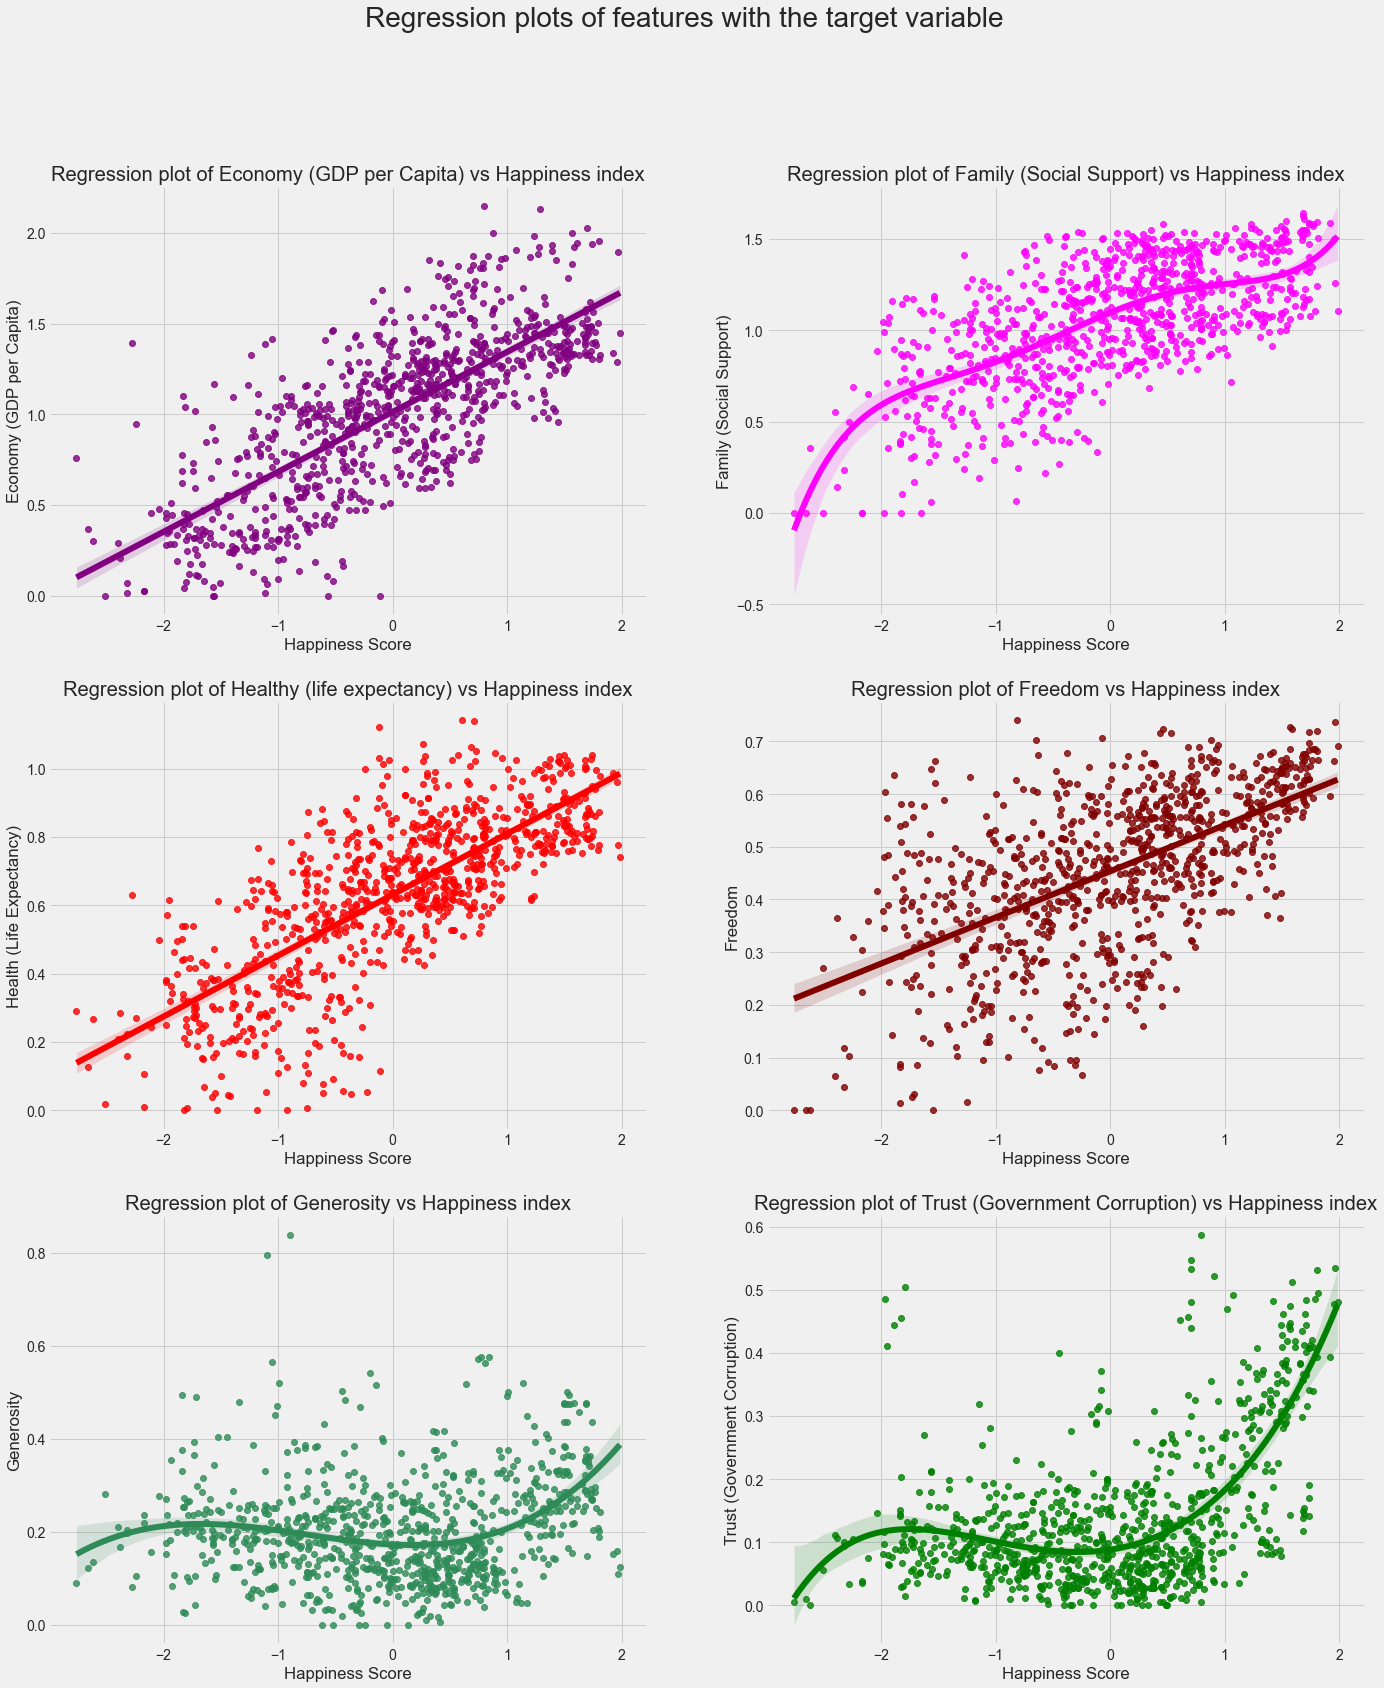

In [2369]:

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(21,25))
dataset = df
dataset["Happiness Score"] = (dataset["Happiness Score"]-dataset["Happiness Score"].mean())/dataset["Happiness Score"].std()

sns.regplot(x=dataset["Happiness Score"], y=dataset["Economy (GDP per Capita)"], color='purple',ax=axes[0,0])
sns.regplot(x=dataset["Happiness Score"], y=dataset["Family (Social Support)"], color='magenta',ax=axes[0,1], order=5)
sns.regplot(x=dataset["Happiness Score"], y=dataset["Health (Life Expectancy)"], color='red',ax=axes[1,0])
sns.regplot(x=dataset["Happiness Score"], y=dataset["Freedom"], color='maroon',ax=axes[1,1])
sns.regplot(x=dataset["Happiness Score"], y=dataset["Generosity"], color='seagreen',ax=axes[2,0],  order=3)
sns.regplot(x=dataset["Happiness Score"], y=dataset["Trust (Government Corruption)"], color='green',ax=axes[2,1], order=5)


axes[0,0].set_title('Regression plot of Economy (GDP per Capita) vs Happiness index')
axes[0,1].set_title('Regression plot of Family (Social Support) vs Happiness index')
axes[1,0].set_title('Regression plot of Healthy (life expectancy) vs Happiness index')
axes[1,1].set_title('Regression plot of Freedom vs Happiness index')
axes[2,0].set_title('Regression plot of Generosity vs Happiness index')
axes[2,1].set_title('Regression plot of Trust (Government Corruption) vs Happiness index')

plt.suptitle('Regression plots of features with the target variable', fontsize=28)
plt.savefig('assets/regression_of_features.png')

In [2370]:
#generate correlation table
# C_RANK = dataset.corr().iloc[3,1:].to_frame()
# C_RANK.style.background_gradient(cmap="RdBu")

In [2371]:
#MOODELLING
MOD_DF = df
# encode categorical variables
labelEditor = preprocessing.LabelEncoder()
MOD_DF['Region'] = labelEditor.fit_transform(MOD_DF['Region'])
MOD_DF['Country'] = labelEditor.fit_transform(MOD_DF['Country'])
print(MOD_DF.info)

<bound method DataFrame.info of      Happiness Rank  Country  Region  Happiness Score  \
0                 1      142      15         1.761267   
1                 2       60      15         1.738585   
2                 3       38      15         1.708924   
3                 4      109      15         1.704562   
4                 5       25       8         1.621684   
..              ...      ...     ...              ...   
138             139      147      14        -1.627983   
139             140      127      14        -1.739649   
143             144      165      14        -2.244765   
144             145       79       7        -2.279661   
145             146        0      13        -2.760350   

     Economy (GDP per Capita)  Family (Social Support)  \
0                     1.39651                  1.34951   
1                     1.30232                  1.40223   
2                     1.32548                  1.36058   
3                     1.45900                  1.33

In [2372]:
# define the predictors
features = [
                'Country',
                'Region',
                'Family (Social Support)',
                'Health (Life Expectancy)',
                'Economy (GDP per Capita)',
                'Freedom',
                'Trust (Government Corruption)',
                'Generosity',
                'Year']
X = MOD_DF[features]
# define the target
y = MOD_DF['Happiness Score']
print(X.info)
print(y.info)

<bound method DataFrame.info of      Country  Region  Family (Social Support)  Health (Life Expectancy)  \
0        142      15                  1.34951                   0.94143   
1         60      15                  1.40223                   0.94784   
2         38      15                  1.36058                   0.87464   
3        109      15                  1.33095                   0.88521   
4         25       8                  1.32261                   0.90563   
..       ...     ...                      ...                       ...   
138      147      14                  0.59700                   0.42500   
139      127      14                  0.41600                   0.27300   
143      165      14                  0.69000                   0.27000   
144       79       7                  0.49800                   0.63100   
145        0      13                  0.00000                   0.28900   

     Economy (GDP per Capita)  Freedom  Trust (Government Corruptio

In [2373]:
# split into the two subsets using random selection (67-33 policy)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9, random_state = 42)

In [2374]:
# create linear regression object
lr = LinearRegression()
# train the model using the training set
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
print(lr_score)

0.7518975967300447


In [2375]:
# how good is our model?
print('Coefficient:', lr.score(X_train, y_train))
print('Intercept:', lr.intercept_)
print('Slope:', lr.coef_)

Coefficient: 0.7769236848772347
Intercept: 38.47370334382376
Slope: [ 7.98394108e-04 -8.36890957e-03  8.63100688e-01  7.04121078e-01
  9.51433080e-01  1.08393314e+00  1.05570650e+00  1.29475557e-01
 -2.05336048e-02]


In [2376]:
coefficients = zip(X.columns, lr.coef_)
coefficients = pd.DataFrame(list(zip(X.columns, lr.coef_)), columns = ['Features', 'Coefficients'])
coefficients.sort_values('Coefficients', ascending = False)

Features  Coefficients
5                        Freedom      1.083933
6  Trust (Government Corruption)      1.055706
4       Economy (GDP per Capita)      0.951433
2        Family (Social Support)      0.863101
3       Health (Life Expectancy)      0.704121
7                     Generosity      0.129476
0                        Country      0.000798
1                         Region     -0.008369
8                           Year     -0.020534

In [2377]:
# make predictions using testset
y_pred = lr.predict(X_test)

In [2378]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_pred.tolist()}).head(25)
pred.head(10)

Actual  Predicted
0  0.653327  -0.017437
1 -1.246747  -0.983289
2 -0.314158   0.115294
3  0.404695   0.112339
4  0.365437   0.855123
5 -0.202491   0.095881
6 -0.336840  -0.319056
7 -1.714350  -1.640068
8 -1.162124  -1.138997
9  0.991816   0.145892

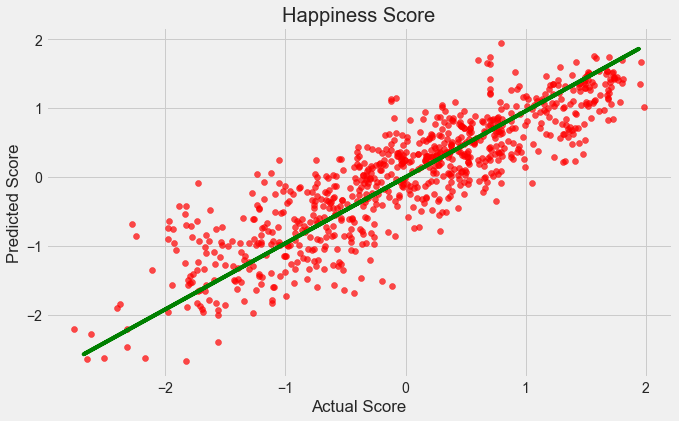

In [2379]:
plt.style.use(style = 'fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)
m, b = np.polyfit(y_pred, y_test, 1)
plt.plot(y_pred, (m * y_pred + b), color = 'g')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Happiness Score')
plt.scatter(y_test, y_pred, alpha = 0.7, color = 'r')
plt.savefig('assets/fig_linear.png')

In [2380]:
import xgboost as xgb
xgb = xgb.XGBRegressor(objective = 'reg:squarederror', n_estimators = 100, max_depth = 3, learning_rate = 0.1)

In [2381]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [2382]:
xgb.score(X_train, y_train)

0.9951264319897638

In [2383]:
y_preds = xgb.predict(X_test)

In [2384]:
rmse = np.sqrt(mean_squared_error(y_test, y_preds))
xgb_score = xgb.score(X_test,y_test)
print(xgb_score)

0.730997782840181


In [2385]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = GridSearchCV(RandomForestRegressor(verbose=0), cv=5, param_grid={"n_estimators":[1000], "criterion":["mse","mae"]}, verbose=0)
rf.fit(X_train,y_train)
rf_score = rf.score(X_test,y_test)
print(rf_score)

C:\Users\19449\Desktop\Lab2\venv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

C:\Users\19449\Desktop\Lab2\venv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

C:\Users\19449\Desktop\Lab2\venv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

C:\Users\19449\Desktop\Lab2\venv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

C:\Users\19449\Desktop\Lab2\venv\lib\site-packages\sklearn\ensemble\_forest.py:400: 

0.7437703317847434


In [2386]:
from sklearn.tree import DecisionTreeRegressor

tr = GridSearchCV(DecisionTreeRegressor(),cv=5,param_grid={"criterion":["mse", "friedman_mse", "mae", "poisson"], "max_depth":np.arange(1,16,1)}, verbose=0)
tr.fit(X_train,y_train)
dt_score = tr.score(X_test,y_test)
print(dt_score)

C:\Users\19449\Desktop\Lab2\venv\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

C:\Users\19449\Desktop\Lab2\venv\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

C:\Users\19449\Desktop\Lab2\venv\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

C:\Users\19449\Desktop\Lab2\venv\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

C:\Users\19449\Desktop\Lab2\venv\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning:


0.5319836475288033


C:\Users\19449\Desktop\Lab2\venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


75 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\19449\Desktop\Lab2\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\19449\Desktop\Lab2\venv\lib\site-packages\sklearn\tree\_classes.py", line 1342, in fit
    super().fit(
  File "C:\Users\19449\Desktop\Lab2\venv\lib\site-packages\sklearn\tree\_classes.py", line 185, in fit
    raise ValueError(
ValueError: Some value(s) of y are negative wh

In [2387]:
# scores = pd.DataFrame([ dt_score, rf_score,xgb_score,lr_score])
# scores.index=['Decision trees','Random Forest','XG Boost','Linear Reg']
# scores.columns=['Score']
# scores.sort_values('Score', ascending=False)
scores = pd.DataFrame({'ML_MODEL' : ['Linear Reg',
                                     'Random Forest',
                                     'XG Boost',
                                     'Decision Tree'
                                     ],
                       'Score' :[
                                    lr_score,
                                    rf_score,
                                    xgb_score,
                                    dt_score
                       ]
                       })
scores.sort_values('Score', ascending=False)
print(scores)

        ML_MODEL     Score
0     Linear Reg  0.751898
1  Random Forest  0.743770
2       XG Boost  0.730998
3  Decision Tree  0.531984


In [2390]:
from dash import dash, dash_table
import os
assets_path = os.getcwd() +'/assets'
app = dash.Dash(__name__,assets_folder=assets_path)
app = JupyterDash("WORLD HAPPINESS DATA VISUALIZATION")

app.layout = html.Div([
    html.H1("WORLD HAPPINESS DATA VISUALIZATION"),
    dcc.Graph(figure = fig_Top10_scatter),
    dcc.Graph(figure = fig_Top10_linear),
    dcc.Graph(figure = fig_Regions),
    dcc.Graph(figure = fig_Changes),
    dcc.Graph(figure = fig_GDP_VS_HAPPINESS_SCATTER),
    dcc.Graph(figure = fig_LIFE_VS_HAPPINESS_SCATTER),
    dcc.Graph(figure = fig_F_SUPPORT_VS_HAPPINESS_SCATTER),
    dcc.Graph(figure = fig_FREEDOM_VS_HAPPINESS),
    html.Img(src= "/assets/regression_of_features.png"),
    dcc.Graph(figure = fig_Correlation),
    html.Img(src= "/assets/fig_linear.png"),
    dash_table.DataTable(data= scores.to_dict('records'),
                         columns= [{"id": i, "name": i} for i in scores.columns],
                         style_cell = {
                'font_family': 'cursive',
                'font_size': '26px',
                'text_align': 'center'
            })




])
app.run_server(debug=False)

 * Running on http://127.0.0.1:8050 (Press CTRL+C to quit)
127.0.0.1 - - [19/May/2022 20:00:48] "GET /_alive_92eb8583-7787-4bed-b597-4e24e231eb5f HTTP/1.1" 200 -


Dash app running on http://127.0.0.1:8050/
